Number of nodes: 4
Number of edges: 3


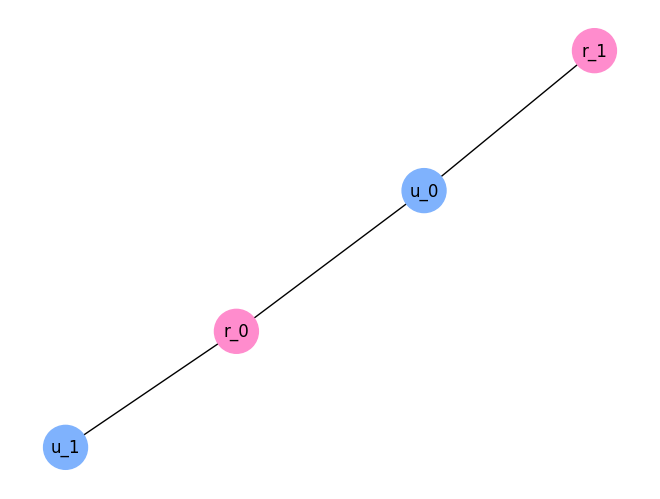

In [52]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv

# Create an empty graph
graph = nx.Graph()

# Open the CSV file and read the data for users
with open('dataset_users.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of repositories into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        """ print("row", i, ": ", row)
        print("row[0] (user ID): ", row[0])
        print("row[1] (username): ", row[1])
        print("row[2] (repositories ID): ", row[2]) """

        # Add the node with data from the first column
        graph.add_node(row[0], name=row[1], repos=row[2], color="#7FB2FD")

# Open the CSV file and read the data for repositories
with open('dataset_repos.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        """ print("row", i, ": ", row)
        print("row[0] (repository ID): ", row[0])
        print("row[1] (repository name): ", row[1])
        print("row[2] (languages): ", row[2]) """

        # Add the node with data from the first column
        graph.add_node(row[0], name=row[1], languages=row[2], color="#FF8CCD")

# Add an edge between users and repositories
for node in graph.nodes:
    # if node starts with "U"
    if node[0] == "u":
        # for each repository in the user's list of repositories
        for repo in graph.nodes[node]['repos']:
            # add an edge between the user and the repository
            graph.add_edge(node, repo)

# Print the number of nodes and edges
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

# Print the neighbors of a node
# print("Neighbors of node 1:", list(G.neighbors(1)))

# Draw the graph using color property to distinguish users and repositories
nx.draw(graph, with_labels=True, node_color=[graph.nodes[node]['color'] for node in graph.nodes], node_size=1000)